In [1]:
# Libraries for Scientific Computing
import numpy as np
import pyquaternion as pyQ

# Libraries for graphics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d.art3d import juggle_axes

### Mechanics

In [2]:
##### Inertial Tensor
### Input:  r -> positions;
###         masses -> masses from the body;
### Output: I -> Matrix representing the Inertial Tensor
##### Gil Miranda - last revision 15/09/2019

def getInertialTensor(r, masses):
    I = np.zeros((3,3))
    for i in range(len(masses)):
        I[0][0] += masses[i]*(r[i][1]**2 + r[i][2]**2)
        I[1][1] += masses[i]*(r[i][0]**2 + r[i][2]**2)
        I[2][2] += masses[i]*(r[i][0]**2 + r[i][1]**2)
        
        I[0][1] -= masses[i]*(r[i][0])*(r[i][1])
        I[0][2] -= masses[i]*(r[i][0])*(r[i][2])
        I[1][2] -= masses[i]*(r[i][1])*(r[i][2])
    I[1][0] = I[0][1]
    I[2][0] = I[0][2]
    I[2][1] = I[1][2]
    
    return I

## ---------------------------------------------------------------

##### Internal Angular Momentum
### Input:  Q -> ?;
###         v -> ?;
###         masses -> masses from the body;
### Output: s -> ?
##### Gil Miranda - last revision 15/09/2019

def getInternalAngularMomentum(Q, v, masses):
    s = np.zeros(3)
    for (i,m) in enumerate(masses):
        s = s + m*np.cross(Q[i], v[i])
    return s

## ---------------------------------------------------------------

##### Center of Mass
### Input:  r -> position vector;
###         masses -> masses from the body;
### Output: cm -> vector for center of mass of the system
##### Gil Miranda - last revision 15/09/2019
def CM(r, masses):
    cm = np.zeros(3)
    for i in range(len(r)):
        cm[0] += masses[i] * r[i][0]
        cm[1] += masses[i] * r[i][1]
        cm[2] += masses[i] * r[i][2]
    total_m = sum(masses)
    cm *= (1/total_m)
    return cm

### Initial Values

In [5]:
masses = np.array([3, 2, 1, 1, 0.2, 2, 1, 1, 1.3])*50
n_mass = len(masses)
r_0 = [None]*n_mass

r_0[0] = [0, 0, 0] # Center of the Body
r_0[1] = [0, -1, 0] # Back of the Body
r_0[2] = [0.5, -1, 1] # Back Paw 1
r_0[3] = [-0.5, -1, 1] # Back Paw 2
r_0[4] = [0, -1.5, -0.5] # Tails

r_0[5] = [0, 1, 0] # Front Body
r_0[6] = [0.5, 1, 1] # Front Paw 1
r_0[7] = [-0.5, 1, 1] # Front Paw 2
r_0[8] = [0, 1.2, -0.2] # Head

r_0 = np.array(r_0)

#### Translation so we have $CM = (0,0,0)$

In [23]:
r_cm = CM(r_0, masses)
for i in range(len(r_0)):
    r_0[i] -= r_cm

#### Motion

In [22]:
## Identity Rotation
q_0 = pyQ.Quaternion(1,0,0,0)
p_0 = [0,0,0]



def particles(t):
    a = np.zeros([len(masses), 3])
    for i in range(len(masses)):
        a[i] = r[i](t)
    return a

def eqOfMotion(x, t, I, L_0):
    # Rotation
    q = np.array(x[:4])
    # Body Angular Momentum
    p = np.array(x[4:])
    
    # Position
    pos = particles(t)
    
    #Velocities
    ep = 1e-7
    v = (particles(t+ep) - particles(t-ep))/(2*ep)
    
    # Tensor of Inertia
    I = getInertialTensor(pos, masses)
    Iinv = np.linalg.inv(A)
    
    # Angular Momentum
    L = getInternalAngularMomentum(pos, v, masses)
    dp_dt = np.cross(np.dot(Iinv, p), (p-L))
    
    omega = np.dot(Iinv, (p-L))
    omega = np.concatenate(([0.], omega))
    dq_dt = 0.5 * q * omega
    return [dq_dt[0], dq_dt[1], dq_dt[2], dq_dt[3]] + [dq_dt[0], dq_dt[1], dq_dt[2]]

In [21]:
np.zeros([9,4])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Plotting the Standing Still Cat

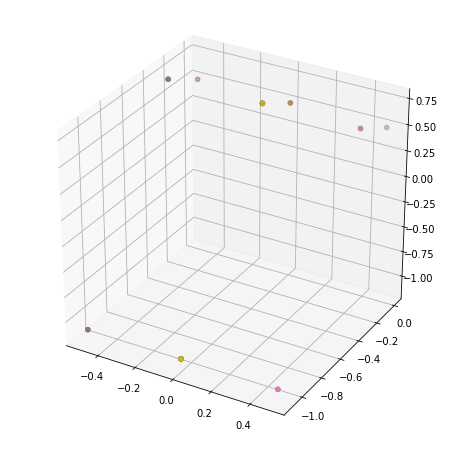

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
for r in r_0:
    ax.scatter3D(r[0], r_0[1], r_0[2])

In [36]:
I = np.random.randn(3,3)

In [37]:
L = np.random.randn(3)

In [38]:
p = np.random.randn(3)

In [39]:
np.cross(np.dot(I,p), (p-L))

array([-0.0334501 ,  9.23403083, -2.99245996])

In [40]:
np.cross(p,np.dot(I,p))-np.cross(p,(np.dot(I,L)))

array([ 0.76293015, -7.09565119,  4.94402122])

In [42]:
np.cross(p,p)

array([0., 0., 0.])